In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

traindata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')
testdata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv')

traindata=traindata.drop('id',axis=1)
testdata=testdata.drop('id',axis=1)

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

traindata['proto'] = lb_make.fit_transform(traindata['proto'])
traindata['service'] = lb_make.fit_transform(traindata['service'])
traindata['state'] = lb_make.fit_transform(traindata['state'])

testdata['proto'] = lb_make.fit_transform(testdata['proto'])
testdata['service'] = lb_make.fit_transform(testdata['service'])
testdata['state'] = lb_make.fit_transform(testdata['state'])

X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,-1]
x = testdata.iloc[:,1:42]
y = testdata.iloc[:,-1]

Using TensorFlow backend.
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ritika/.virtualen

In [2]:
X

,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,113,0,2,6,4,258,172,74.087490,252,254,...,1,1,1,1,0,0,0,1,1,0
1,113,0,2,14,38,734,42014,78.473372,62,252,...,1,1,1,2,0,0,0,1,6,0
2,113,0,2,8,16,364,13186,14.170161,62,252,...,2,1,1,3,0,0,0,2,6,0
3,113,3,2,12,12,628,770,13.677108,62,252,...,2,1,1,3,1,1,0,2,1,0
4,113,0,2,10,6,534,268,33.373826,254,252,...,2,2,1,40,0,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,119,2,3,2,0,114,0,111111.107200,254,0,...,24,24,13,24,0,0,0,24,24,0
175337,113,0,2,10,8,620,354,33.612649,254,252,...,1,1,1,2,0,0,0,1,1,0
175338,119,2,3,2,0,114,0,111111.107200,254,0,...,3,3,3,13,0,0,0,3,12,0
175339,119,2,3,2,0,114,0,111111.107200,254,0,...,30,30,14,30,0,0,0,30,30,0


In [3]:
Arr = X.values
arr = x.values

In [4]:
import librosa
Arr_Delta = librosa.feature.delta(Arr)
arr_delta = librosa.feature.delta(arr)

In [5]:
Delta1 = pd.DataFrame(Arr_Delta)
delta1 = pd.DataFrame(arr_delta)

In [6]:
XDelta1 = pd.concat([X, Delta1], axis=1)
xdelta1 = pd.concat([x, delta1], axis=1)

In [7]:
scaler = Normalizer().fit(XDelta1)
XDelta1 = scaler.transform(XDelta1)
scaler = Normalizer().fit(xdelta1)
xdelta1 = scaler.transform(xdelta1)

Y = np.array(Y)
y = np.array(y)

XDelta1 = np.reshape(XDelta1, (XDelta1.shape[0],XDelta1.shape[1],1))
xdelta1 = np.reshape(xdelta1, (xdelta1.shape[0],xdelta1.shape[1],1))

lstm_output_size = 70

In [8]:
cnn = Sequential()
cnn.add(Convolution1D(64, 3, border_mode="same",activation="relu",input_shape=(82, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Bidirectional(LSTM(lstm_output_size)))
cnn.add(Dropout(0.1))
cnn.add(Dense(1, activation="sigmoid"))

cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
folds=10
   
history = cnn.fit(XDelta1, Y, epochs=200, validation_data=(xdelta1, y))

/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", input_shape=(82, 1), padding="same")`
  



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 175341 samples, validate on 82332 samples
Epoch 1/200
175341/175341 [==============================] - 653s 4ms/step - loss: 0.3956 - accuracy: 0.7946 - val_loss: 0.5517 - val_accuracy: 0.7108
Epoch 2/200
175341/175341 [==============================] - 653s 4ms/step - loss: 0.3654 - accuracy: 0.8213 - val_loss: 0.5331 - val_accuracy: 0.7198
Epoch 3/200
175341/175341 [==============================] - 655s 4ms/step - loss: 0.3584 - accuracy: 0.8272 - val_loss: 0.5582 - val_accuracy: 0.6996
Epoch 4/200
175341/175341 [==============================] - 644s 4ms/step - loss: 0.3540 - accuracy: 0.8293 - val_loss: 0.5519 - val_accuracy: 0.7281
Epoch 5/200
175341/175341 [==============================] - 642s 4ms/step - loss: 0.3530 - accuracy: 0.8288 - val_loss: 0.5346 - val_accuracy: 0.7354
Epoch 6/200
175341/175341 [==============================] - 639s 4ms/step - loss: 0.3502 - accura

175341/175341 [==============================] - 243s 1ms/step - loss: 0.2418 - accuracy: 0.8839 - val_loss: 0.4077 - val_accuracy: 0.7485
Epoch 50/200
175341/175341 [==============================] - 243s 1ms/step - loss: 0.2445 - accuracy: 0.8836 - val_loss: 0.3990 - val_accuracy: 0.7499
Epoch 51/200
175341/175341 [==============================] - 243s 1ms/step - loss: 0.2417 - accuracy: 0.8846 - val_loss: 0.4036 - val_accuracy: 0.7565
Epoch 52/200
175341/175341 [==============================] - 243s 1ms/step - loss: 0.2412 - accuracy: 0.8853 - val_loss: 0.3939 - val_accuracy: 0.7574
Epoch 53/200
175341/175341 [==============================] - 244s 1ms/step - loss: 0.2402 - accuracy: 0.8855 - val_loss: 0.3865 - val_accuracy: 0.7508
Epoch 54/200
175341/175341 [==============================] - 244s 1ms/step - loss: 0.2392 - accuracy: 0.8860 - val_loss: 0.3971 - val_accuracy: 0.7518
Epoch 55/200
175341/175341 [==============================] - 244s 1ms/step - loss: 0.2398 - accuracy

175341/175341 [==============================] - 246s 1ms/step - loss: 0.2281 - accuracy: 0.8929 - val_loss: 0.4012 - val_accuracy: 0.7584
Epoch 103/200
175341/175341 [==============================] - 245s 1ms/step - loss: 0.2289 - accuracy: 0.8928 - val_loss: 0.4048 - val_accuracy: 0.7573
Epoch 104/200
175341/175341 [==============================] - 244s 1ms/step - loss: 0.2287 - accuracy: 0.8926 - val_loss: 0.4077 - val_accuracy: 0.7498
Epoch 105/200
175341/175341 [==============================] - 244s 1ms/step - loss: 0.2283 - accuracy: 0.8930 - val_loss: 0.4174 - val_accuracy: 0.7505
Epoch 106/200
175341/175341 [==============================] - 245s 1ms/step - loss: 0.2272 - accuracy: 0.8939 - val_loss: 0.3874 - val_accuracy: 0.7555
Epoch 107/200
175341/175341 [==============================] - 245s 1ms/step - loss: 0.2274 - accuracy: 0.8932 - val_loss: 0.3889 - val_accuracy: 0.7577
Epoch 108/200
175341/175341 [==============================] - 245s 1ms/step - loss: 0.2274 - ac

175341/175341 [==============================] - 244s 1ms/step - loss: 0.2080 - accuracy: 0.9051 - val_loss: 0.3824 - val_accuracy: 0.7677
Epoch 156/200
175341/175341 [==============================] - 244s 1ms/step - loss: 0.2145 - accuracy: 0.9035 - val_loss: 0.4447 - val_accuracy: 0.7613
Epoch 157/200
175341/175341 [==============================] - 245s 1ms/step - loss: 0.2170 - accuracy: 0.9035 - val_loss: 0.3826 - val_accuracy: 0.7663
Epoch 158/200
175341/175341 [==============================] - 245s 1ms/step - loss: 0.2133 - accuracy: 0.9044 - val_loss: 0.3912 - val_accuracy: 0.7608
Epoch 159/200
175341/175341 [==============================] - 245s 1ms/step - loss: 0.2098 - accuracy: 0.9040 - val_loss: 0.3809 - val_accuracy: 0.7757
Epoch 160/200
175341/175341 [==============================] - 245s 1ms/step - loss: 0.2072 - accuracy: 0.9053 - val_loss: 0.3902 - val_accuracy: 0.7706
Epoch 161/200
175341/175341 [==============================] - 245s 1ms/step - loss: 0.2061 - ac

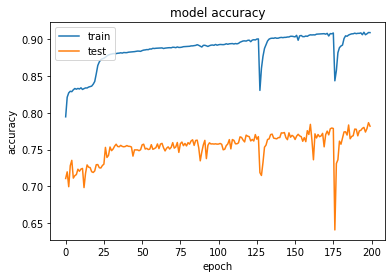

In [9]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('BinaryEFD2 + LSTM + Accuracy.png')
plt.show()

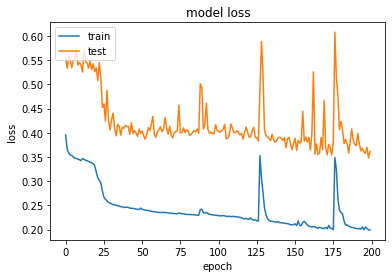

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('BinaryEFD2 + LSTM + Loss.png')
plt.show()

In [12]:
from sklearn.metrics import accuracy_score,classification_report
predictions = cnn.predict([xdelta1])
predictions = [0 if i<0.5 else 1 for i in predictions]
print("Accuracy: ",accuracy_score(y,predictions))
from sklearn.metrics import confusion_matrix

print("Classification Report: \n",classification_report(y,predictions))
conmat = np.array(confusion_matrix(y, predictions, labels=[0,1]))
confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
print (confusion)

Accuracy:  0.7818466695816936
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.54      0.69     37000
           1       0.72      0.98      0.83     45332

    accuracy                           0.78     82332
   macro avg       0.84      0.76      0.76     82332
weighted avg       0.83      0.78      0.77     82332

          predicted_negative  predicted_positive
negative               20023               16977
positive                 984               44348
